In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []
for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_oe-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "LoraProbe_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "LoraProbe-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

lora_probe_df = pd.concat(all_dfs)

all_dfs = []

for fn in glob.glob("results/eval-mmlu_oe-ct_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CTProbe_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CTProbe-TS_" + model_name
    df["mode_tag"] = "oe -> oe"
    all_dfs.append(df)

ct_probe_df = pd.concat(all_dfs)

df = pd.read_csv("results/classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("results/classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df, lora_probe_df, ct_probe_df])
df = df[df["mode_tag"] == "oe -> oe"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("results/ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "oe"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

samp_df = pd.read_csv("results/sampling_results.csv")

samp_count_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting',
    'split',
    'model'
]]
samp_count_df['style'] = "Samp. Counting"
samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
samp_count_df['unc_ece'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_counting']

samp_likeli_df = samp_df[[
    'dataset', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood', 
    'fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood',
    'split',
    'model'
]]
samp_likeli_df['style'] = "Samp. Likelihood"
samp_likeli_df['unc_auroc'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_likelihood']
samp_likeli_df['unc_ece'] = samp_likeli_df['fuzzy_gpt-3\\\\.5-turbo-1106_ece_likelihood']

df = pd.concat([df, ve_df, samp_count_df, samp_likeli_df])
df = df[df["split"] == "test"]

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
oe_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

oe_df["unc_ece"] = oe_df["unc_ece"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
oe_df["unc_auroc"] = oe_df["unc_auroc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])
oe_df["unc_acc"] = oe_df["unc_acc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_unc_acc"])
oe_df["acc"] = oe_df["acc"].fillna(oe_df["fuzzy_gpt-3.5-turbo-1106_acc"])

/tmp/ipykernel_3156274/3634028901.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['style'] = "Samp. Counting"
/tmp/ipykernel_3156274/3634028901.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_count_df['unc_auroc'] = samp_count_df['fuzzy_gpt-3\\\\.5-turbo-1106_auroc_counting']
/tmp/ipykernel_3156274/3634028901.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [2]:
discr_df = pd.read_csv("../fresh_classifier_results.csv")
discr_df = discr_df[discr_df["split"] == "test"]

print(discr_df.columns)
discr_df["model"] = discr_df["model_name"].apply(lambda x: model_name_map[x])

discr_oe = discr_df[(discr_df["eval_mode"] == "oe") & (discr_df["train_mode"] == "oe")]

ve1s1g_df = discr_oe[discr_oe["eval_method"] == "ve1s1g"]
ve1s1g_df["style"] = "VE 1S1G"

ve2s1g_df = discr_oe[discr_oe["eval_method"] == "ve2s1g"]
ve2s1g_df["style"] = "VE 2S1G"

probe_df = discr_oe[discr_oe["eval_method"] == "classifier"]
probe_df["style"] = "Probe"

discr_oe = pd.concat([
    ve1s1g_df,
    ve2s1g_df,
    probe_df,
    oe_df[oe_df["style"] == 'Logits'],
    oe_df[oe_df["style"] == 'Query'],
    oe_df[oe_df["style"] == 'LoraProbe'],
    oe_df[oe_df["style"] == 'CT'],
    oe_df[oe_df["style"] == "Samp. Counting"],
    oe_df[oe_df["style"] == "Samp. Likelihood"],
])

discr_oe = discr_oe.groupby(["dataset", "model", "style"]).mean().reset_index()

Index(['N', 'logits_ece', 'acc', 'unc_acc', 'unc_auroc', 'unc_ece', 'dataset',
       'split', 'ts', 'model_name', 'eval_method', 'eval_mode', 'train_mode'],
      dtype='object')


/tmp/ipykernel_3156274/2211122970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve1s1g_df["style"] = "VE 1S1G"
/tmp/ipykernel_3156274/2211122970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve2s1g_df["style"] = "VE 2S1G"
/tmp/ipykernel_3156274/2211122970.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

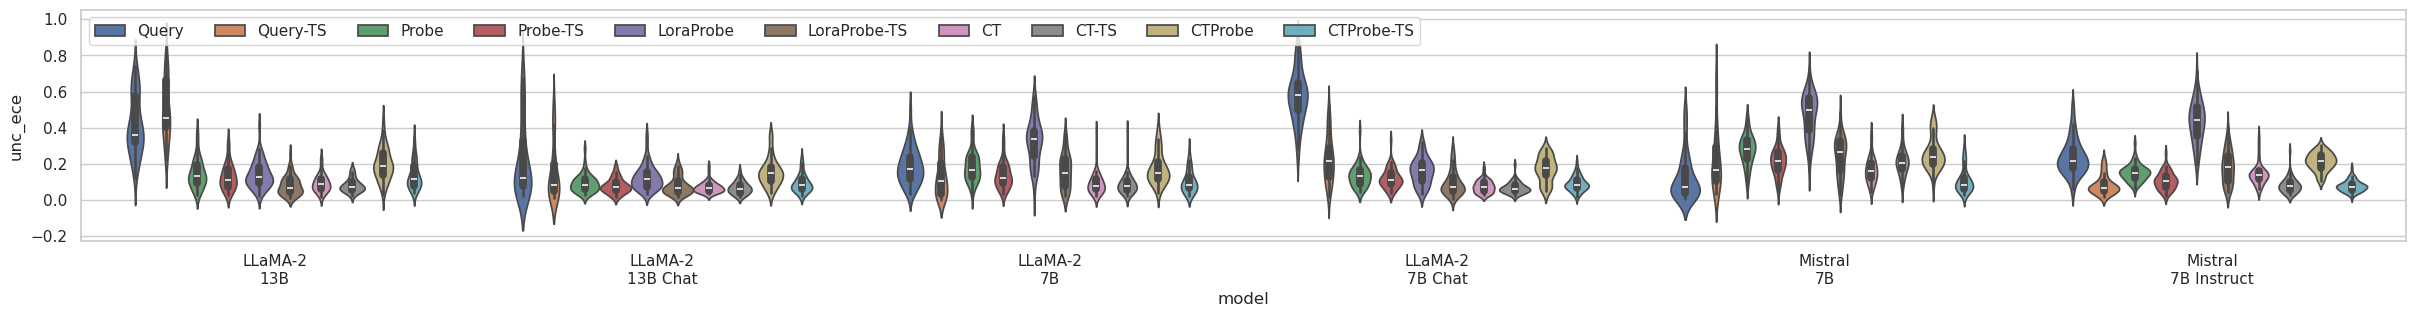

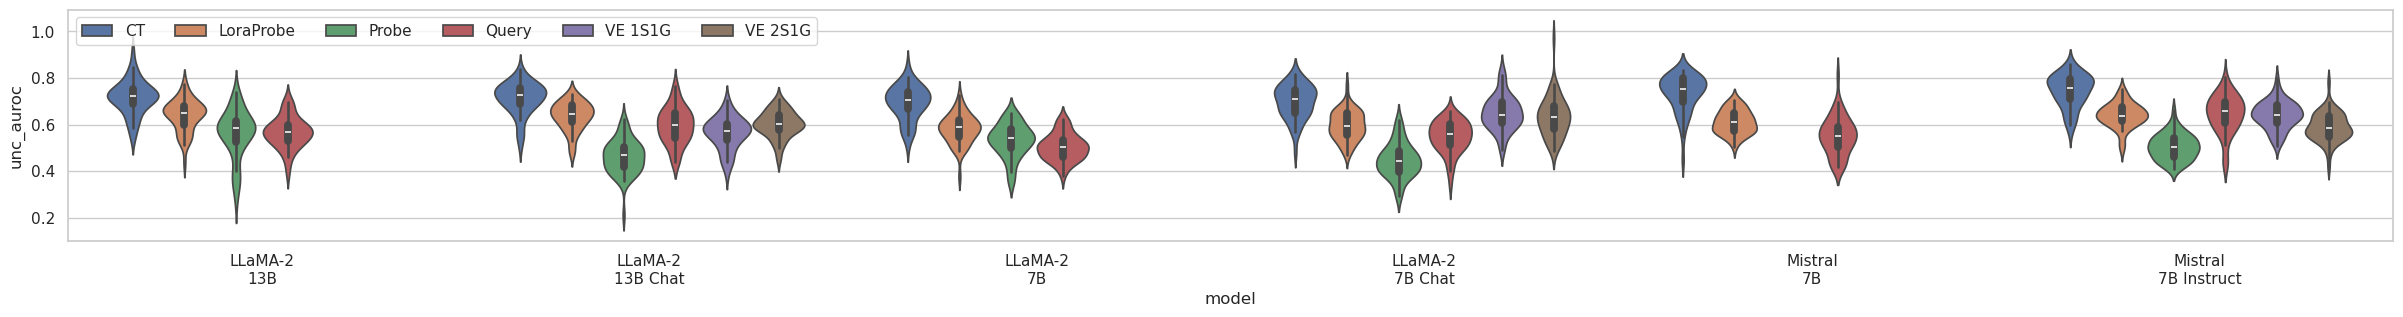

In [203]:
fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=oe_df,
    hue="style",
    hue_order=["Query", "Query-TS", "Probe","Probe-TS", "LoraProbe", "LoraProbe-TS", "CT", "CT-TS", "CTProbe","CTProbe-TS"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=discr_oe,
    hue="style",
    # hue_order=["Query", "Query-TS", "Probe","Probe-TS", "LoraProbe", "LoraProbe-TS", "CT", "CT-TS", "CTProbe","CTProbe-TS"],
    x="model",
    y="unc_auroc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

Text(0.5, 0, '')

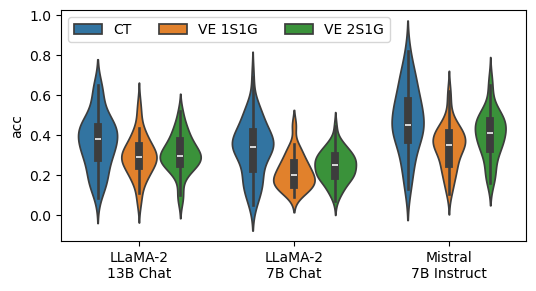

In [3]:
fig, ax = plt.subplots(figsize=(6, 3))

sns.violinplot(
    ax=ax,
    data=oe_df[oe_df['model'].str.contains("Chat") | oe_df['model'].str.contains("Instruct")],
    hue="style",
    hue_order=["CT", "VE 1S1G", "VE 2S1G"],
    x="model",
    y="acc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=6)

plt.xlabel("")

# rotate the labels
# plt.xticks(rotation=30)

/tmp/ipykernel_3102230/4217144879.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_3102230/4217144879.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_3102230/4217144879.py:174: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(vals[1:])


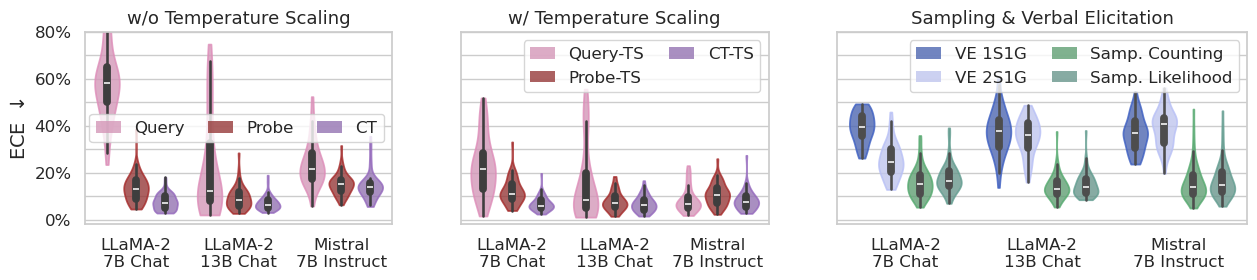

In [4]:
import palettable

mendl = palettable.wesanderson.Mendl_4.hex_colors
moonrise45 = palettable.wesanderson.Moonrise4_5.hex_colors

color_map = {
    "CT": "#9468bd",
    "CT-TS": "#9468bd",

    "Query": mendl[0],
    "Query-TS": mendl[0],

    "Logits": "#55aa6f",
    "Logits-TS": "#55aa6f",

    "Samp. Counting": "#55aa6f",
    "Samp. Likelihood": "#629d90",

    "Probe": "brown",
    "Probe-TS": "brown",

    "VE 1S1G": "#3d5fc2",
    "VE 1S2G": mendl[3],
    "VE 2S1G": mendl[1],
    "VE 2S2G": "#9ca7f2",
    "VE 2S1CoT": "#5da2da",
}

sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 2.5), sharey=True, gridspec_kw={'width_ratios': [3, 3, 4]})

hue_order = ["Query", "Probe", "CT"]
palette = [color_map[x] for x in hue_order]


sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
)

handles, labels = axs[0].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[0].legend(
    handles=handles, labels=labels, ncol=3, fontsize=12,
    columnspacing=1.4, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[0].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

axs[0].set_xlabel("")
axs[0].set_ylabel("ECE $\downarrow$", fontsize=14)

axs[0].set_title("w/o Temperature Scaling", fontsize=13)




hue_order = ["Query-TS", "Probe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
)

handles, labels = axs[1].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])


axs[1].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[1].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)

axs[1].set_xlabel("")
axs[1].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[1].set_title("w/ Temperature Scaling", fontsize=13)



hue_order = ["VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood",]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=oe_df[oe_df['model'].str.contains("Chat") | oe_df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
)

handles, labels = axs[2].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[2].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])


axs[2].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[2].legend_.get_patches():
    l.set_edgecolor('none')

axs[2].set_ylim(-0.02, 0.8)

#turn y tick labels into percentage
vals = axs[2].get_yticks()
vals = ['{:,.0%}'.format(vals[i // 2]) if i % 2 == 0 else "" for i in range(len(vals) * 2)]
axs[2].set_yticklabels(vals[1:])
axs[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))

#increase yticks font size and xticks font size
axs[2].tick_params(axis='y', labelsize=12)
axs[2].tick_params(axis='x', labelsize=12)

axs[2].set_xlabel("")
axs[2].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[2].set_title("Sampling & Verbal Elicitation", fontsize=13)

plt.savefig("oe_violin_plots.pdf", bbox_inches="tight")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

all_dfs = []
for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-base-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CT-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "LoraProbe_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-lora_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "LoraProbe-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

lora_probe_df = pd.concat(all_dfs)

all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-ct_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CTProbe_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct_probe-ts/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "CTProbe-TS_" + model_name
    df["mode_tag"] = "choice -> choice"
    all_dfs.append(df)

ct_probe_df = pd.concat(all_dfs)

df = pd.read_csv("results/classifier_results.csv")
df["model_name"] = df["model_name"].apply(lambda x: "Probe_" + x)
df["mode_tag"] = df["train_mode"] + " -> " + df["eval_mode"]

ts_df = pd.read_csv("results/classifier_ts_results.csv")
ts_df["model_name"] = ts_df["model_name"].apply(lambda x: "Probe-TS_" + x)
ts_df["mode_tag"] = ts_df["train_mode"] + " -> " + ts_df["eval_mode"]

# df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
# df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

df = pd.concat([df, ts_df, base_df, ct_df, lora_probe_df, ct_probe_df])
df = df[df["mode_tag"] == "choice -> choice"]

df["model"] = df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
df["style"] = df["model_name"].apply(lambda x: x.split("_")[0])

ve_df = pd.read_csv("results/ve_results.csv")
ve_df = ve_df[ve_df["eval_mode"] == "choice"]
ve_df["model"] = ve_df["model_name"]
ve_df["style"] = ve_df["eval_method"].apply(lambda x: "VE " + x[2:].upper())

#copy base df
logits_df = base_df.copy()
logits_df = logits_df[logits_df["mode_tag"] == "choice -> choice"]
logits_df["model"] = logits_df["model_name"].apply(lambda x: "_".join(x.split("_")[1:]))
logits_df["style"] = "Logits"
logits_df["unc_ece"] = logits_df["logits_ece"]

all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-logits_ts/*.csv"):
    _df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    _df["model"] = model_name
    all_dfs.append(_df)

logits_ts_df = pd.concat(all_dfs)
logits_ts_df["style"] = "Logits-TS"
logits_ts_df["unc_ece"] = logits_ts_df["logits_ece"]


df = pd.concat([df, ve_df, logits_df, logits_ts_df])
df = df[df['split'] == 'test']

model_name_map = {
    "llama2_7b": "LLaMA-2\n7B",
    "llama2_7b_chat": "LLaMA-2\n7B Chat",
    "llama2_13b": "LLaMA-2\n13B",
    "llama2_13b_chat": "LLaMA-2\n13B Chat",
    "mistral_7b": "Mistral\n7B",
    "mistral_7b_instruct": "Mistral\n7B Instruct",
}

df["model"] = df["model"].apply(lambda x: model_name_map[x])

#aggregate by model name
mcqa_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()

mcqa_df["unc_ece"] = mcqa_df["unc_ece"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
mcqa_df["unc_auroc"] = mcqa_df["unc_auroc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])
mcqa_df["unc_acc"] = mcqa_df["unc_acc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_unc_acc"])
mcqa_df["acc"] = mcqa_df["acc"].fillna(mcqa_df["fuzzy_gpt-3.5-turbo-1106_acc"])

/tmp/ipykernel_3156274/4089012848.py:136: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mcqa_df = df.groupby(["dataset", "model", "style"]).mean().reset_index()


In [4]:
discr_df = pd.read_csv("../fresh_classifier_results.csv")
discr_df = discr_df[discr_df["split"] == "test"]

print(discr_df.columns)
discr_df["model"] = discr_df["model_name"].apply(lambda x: model_name_map[x])
# discr_df["style"] = discr_df["eval_method"]

discr_mcqa = discr_df[(discr_df["eval_mode"] == "choice") & (discr_df["train_mode"] == "choice")]

ve1s1g_df = discr_mcqa[discr_mcqa["eval_method"] == "ve1s1g"]
ve1s1g_df["style"] = "VE 1S1G"

ve2s1g_df = discr_mcqa[discr_mcqa["eval_method"] == "ve2s1g"]
ve2s1g_df["style"] = "VE 2S1G"

probe_df = discr_mcqa[discr_mcqa["eval_method"] == "classifier"]
probe_df["style"] = "Probe"

discr_mcqa = pd.concat([
    ve1s1g_df,
    ve2s1g_df,
    probe_df,
    mcqa_df[mcqa_df["style"] == 'Logits'],
    mcqa_df[mcqa_df["style"] == 'Query'],
    mcqa_df[mcqa_df["style"] == 'LoraProbe'],
    mcqa_df[mcqa_df["style"] == 'CT'],
])

discr_mcqa = discr_mcqa.groupby(["dataset", "model", "style"]).mean().reset_index()



Index(['N', 'logits_ece', 'acc', 'unc_acc', 'unc_auroc', 'unc_ece', 'dataset',
       'split', 'ts', 'model_name', 'eval_method', 'eval_mode', 'train_mode'],
      dtype='object')


/tmp/ipykernel_3156274/238853514.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve1s1g_df["style"] = "VE 1S1G"
/tmp/ipykernel_3156274/238853514.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ve2s1g_df["style"] = "VE 2S1G"
/tmp/ipykernel_3156274/238853514.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

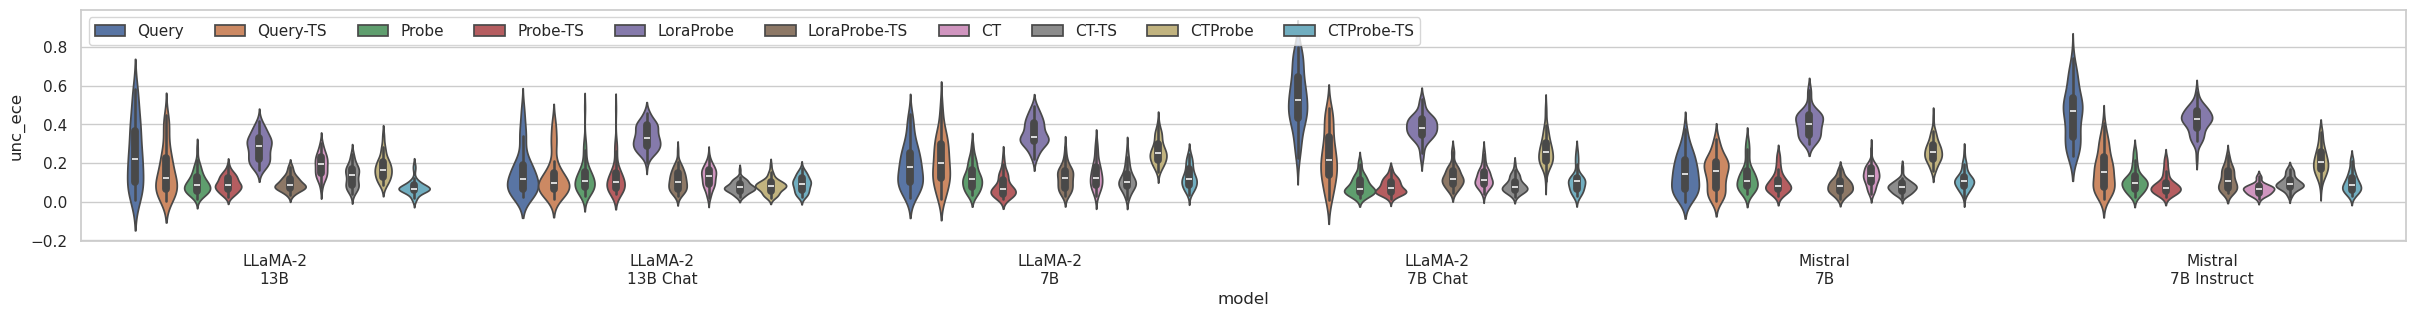

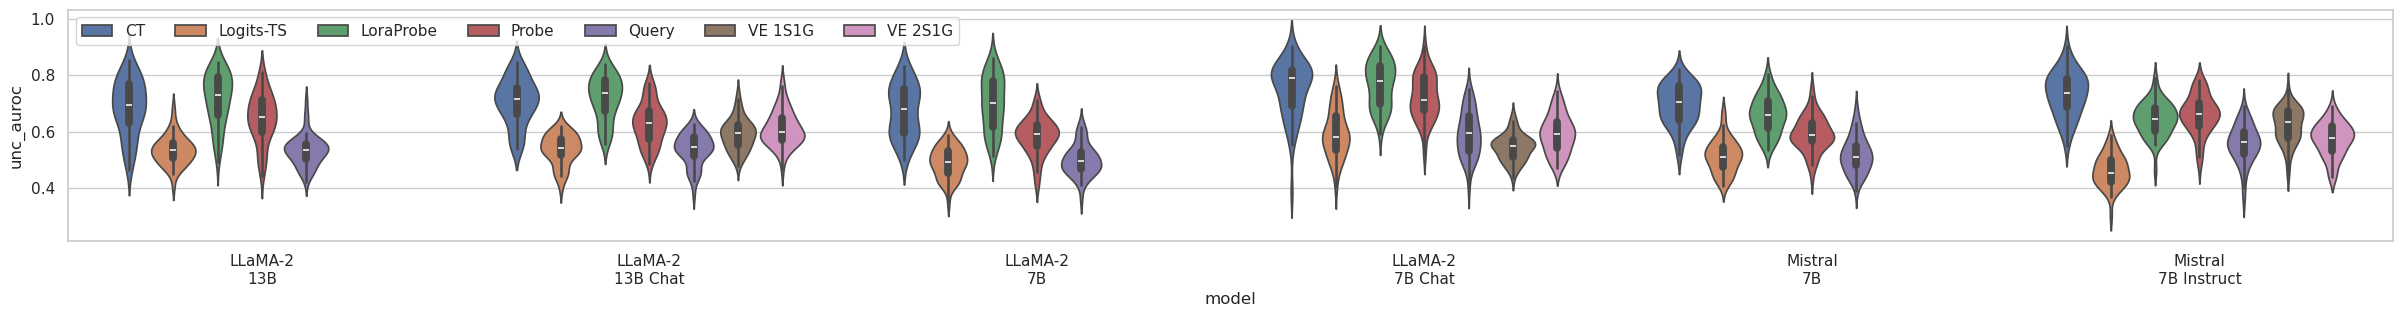

In [190]:
fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=mcqa_df,
    hue="style",
    hue_order=["Query", "Query-TS", "Probe","Probe-TS", "LoraProbe", "LoraProbe-TS", "CT", "CT-TS", "CTProbe", "CTProbe-TS"],
    x="model",
    y="unc_ece",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

fig, ax = plt.subplots(figsize=(30, 3))

sns.violinplot(
    ax=ax,
    data=discr_mcqa,
    hue="style",
    # hue_order=["Query", "Query-TS", "Probe","Probe-TS", "LoraProbe", "LoraProbe-TS", "CT", "CT-TS", "CTProbe", "CTProbe-TS"],
    x="model",
    y="unc_auroc",
    # hue_order=order,
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left', ncol=10)

plt.show()

In [31]:
import palettable

mendl = palettable.wesanderson.Mendl_4.hex_colors
moonrise45 = palettable.wesanderson.Moonrise4_5.hex_colors

color_map = {
    # "CT": "#9468bd",
    # "CT-TS": "#9468bd",

    "CT": "#8a0666", #"#7436ad",
    "CT-TS": "#8a0666",# "#7436ad",

    "Query": mendl[0],
    "Query-TS": mendl[0],

    "Logits": "#55aa6f",
    "Logits-TS": "#55aa6f",

    "Samp. Counting": "#55aa6f",
    "Samp. Likelihood": "#629d90",

    "Probe": "#df1184", #"#af8ece",
    "Probe-TS": "#df1184", #af8ece",

    "LoraProbe": "#c60f75", #"#9468bd",
    "LoraProbe-TS": "#c60f75",
    
    "VE 2S1G": "#3d5fc2",
    "VE 2S2G": mendl[3],
    "VE 1S1G": mendl[1],
    "VE 1S2G": "#9ca7f2",
    "VE 2S1CoT": "#5da2da",
}


/tmp/ipykernel_3156274/2636472920.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_3156274/2636472920.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_3156274/2636472920.py:152: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(vals[1:])
/tmp/ipykernel_3156274/2636472920.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(["L2 7B\nChat", "L2 13B\nChat", "M 7B\nInstruct"], fontsize=12)


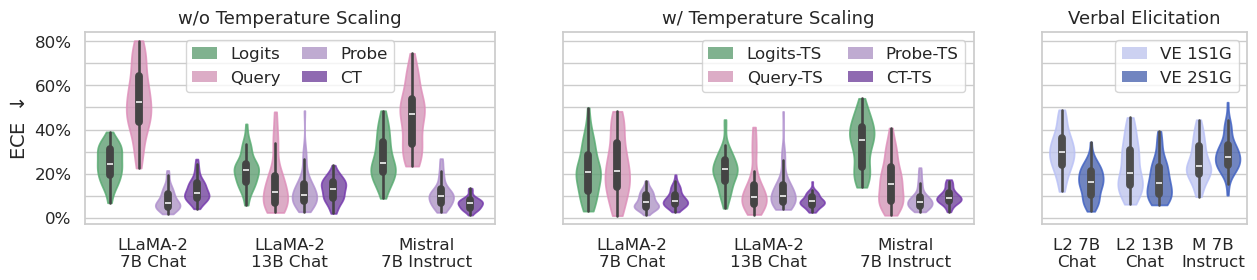

In [28]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(
    1, 3, 
    figsize=(15, 2.5), 
    sharey=True, 
    gridspec_kw={
        'width_ratios': [4, 4, 2],
    },
    # constrained_layout=True
)

hue_order = ["Logits", "Query", "Probe", "CT"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=mcqa_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[0],
)

handles, labels = axs[0].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])


axs[0].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.25, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[0].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

axs[0].set_xlabel("")
axs[0].set_ylabel("ECE $\downarrow$", fontsize=14)

axs[0].set_title("w/o Temperature Scaling", fontsize=13)




hue_order = ["Logits-TS", "Query-TS", "Probe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=mcqa_df,
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[1],
)

handles, labels = axs[1].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])


axs[1].legend(
    handles=handles, labels=labels, ncol=2, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[1].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[1].get_yticks()
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#increase yticks font size and xticks font size
axs[1].tick_params(axis='y', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)

axs[1].set_xlabel("")
axs[1].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[1].set_title("w/ Temperature Scaling", fontsize=13)



hue_order = ["VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    data=mcqa_df[mcqa_df['model'].str.contains("Chat") | mcqa_df['model'].str.contains("Instruct")],
    hue="style",
    x="model",
    y="unc_ece",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=axs[2],
)

handles, labels = axs[2].get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in axs[2].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])


axs[2].legend(
    handles=handles, labels=labels, ncol=1, fontsize=12,
    columnspacing=1.5, handlelength=1.5,
)
#remove edge from patches in the legend
for l in axs[2].legend_.get_patches():
    l.set_edgecolor('none')

#turn y tick labels into percentage
vals = axs[2].get_yticks()
vals = ['{:,.0%}'.format(vals[i // 2]) if i % 2 == 0 else "" for i in range(len(vals) * 2)]
axs[2].set_yticklabels(vals[1:])
axs[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))

axs[2].set_xticklabels(["L2 7B\nChat", "L2 13B\nChat", "M 7B\nInstruct"], fontsize=12)

#increase yticks font size and xticks font size
axs[2].tick_params(axis='y', labelsize=12)
axs[2].tick_params(axis='x', labelsize=12)

axs[2].set_xlabel("")
axs[2].set_ylabel("ECE $\downarrow$", fontsize=12)

axs[2].set_title("Verbal Elicitation", fontsize=13)

plt.savefig("mcqa_violin_plots.pdf", bbox_inches="tight")

/tmp/ipykernel_3156274/299989645.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_3156274/299989645.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


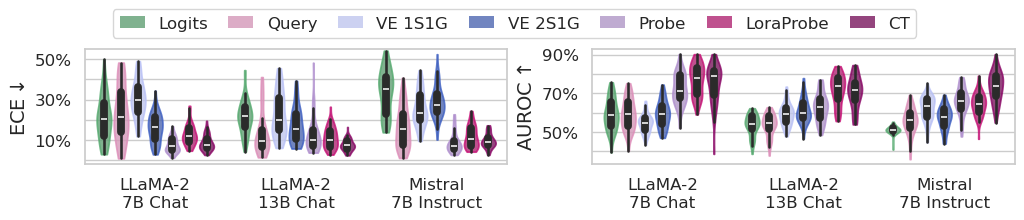

In [32]:
fig, axs = plt.subplots(
    1, 2, 
    figsize=(12, 1.5), 
    # constrained_layout=True
)

# models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat", "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]
models = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"]
hue_order = ["Logits-TS", "Query-TS", "VE 1S1G", "VE 2S1G", "Probe-TS", "LoraProbe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    data=mcqa_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("ECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = ["Logits", "Query", "VE 1S1G", "VE 2S1G", "Probe", "LoraProbe", "CT"]

ax = axs[1]
sns.violinplot(
    data=discr_mcqa,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("AUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()


# ax.set_title("w/o Temperature Scaling", fontsize=13)

l = fig.legend(
    handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=7, fontsize=12,
    columnspacing=1.25, handlelength=1.5, bbox_to_anchor=(0.825, 1.2),
)
# remove edge from patches in the legend
for _l in l.get_patches():
    _l.set_edgecolor('none')

plt.savefig("mcqa_violin_plots_combined.pdf", bbox_inches="tight")

/tmp/ipykernel_3156274/2342570793.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_3156274/2342570793.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


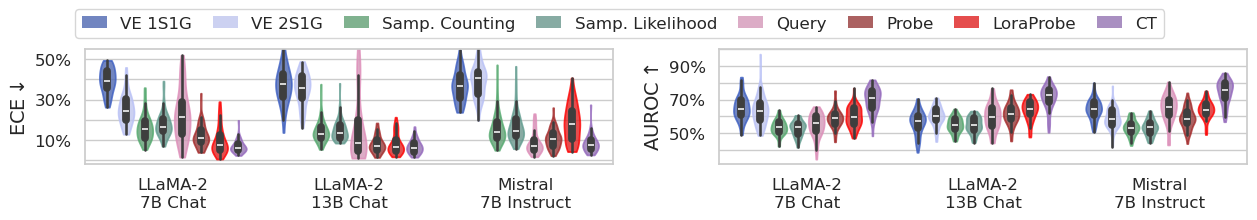

In [8]:
fig, axs = plt.subplots(
    1, 2, 
    figsize=(15, 1.5), 
    # constrained_layout=True
)

# models = ["LLaMA-2\n7B", "LLaMA-2\n7B Chat", "LLaMA-2\n13B", "LLaMA-2\n13B Chat", "Mistral\n7B", "Mistral\n7B Instruct"]
models = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"]
hue_order = ["VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query-TS", "Probe-TS", "LoraProbe-TS", "CT-TS"]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    data=oe_df,
    hue="style",
    x="model",
    y="unc_ece",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("ECE$\downarrow$", fontsize=14)
ax.get_legend().remove()

hue_order = ["VE 1S1G", "VE 2S1G", "Samp. Counting", "Samp. Likelihood", "Query", "Probe", "LoraProbe", "CT"]

ax = axs[1]
sns.violinplot(
    data=discr_oe,
    hue="style",
    x="model",
    y="unc_auroc",
    order=models,
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    ax=ax,
)

handles, labels = ax.get_legend_handles_labels()

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# ax.set_ylim((-0.02, 0.55))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
#turn y tick labels into percentage
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


#increase yticks font size and xticks font size
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

ax.set_xlabel("")
ax.set_ylabel("AUROC$\\uparrow$", fontsize=14)
ax.get_legend().remove()


# ax.set_title("w/o Temperature Scaling", fontsize=13)

l = fig.legend(
    handles=handles, labels=[l.replace("-TS","") for l in labels], ncol=8, fontsize=12,
    columnspacing=1.25, handlelength=1.5, bbox_to_anchor=(0.85, 1.2),
)
# remove edge from patches in the legend
for _l in l.get_patches():
    _l.set_edgecolor('none')

plt.savefig("oe_violin_plots_combined.pdf", bbox_inches="tight")

In [21]:
import pandas as pd

df = pd.read_csv("../fresh_classifier_results.csv")

print(df.columns)

Index(['N', 'logits_ece', 'acc', 'unc_acc', 'unc_auroc', 'unc_ece', 'dataset',
       'split', 'ts', 'model_name', 'eval_method', 'eval_mode', 'train_mode'],
      dtype='object')


In [19]:
new_ve = pd.read_csv("../fresh_classifier_results.csv")
# new_ve = new_ve[(new_ve["eval_method"] == "ve1s1g") | (new_ve["eval_method"] == "ve2s1g")]

print(new_ve)

        N  logits_ece       acc   unc_acc  unc_auroc   unc_ece  \
0      11    0.190243  0.181818  0.818182   0.333333  0.249426   
1     100    0.096897  0.320000  0.660000   0.460018  0.077809   
2      14    0.235336  0.642857  0.500000   0.244444  0.231696   
3     135    0.063554  0.459259  0.600000   0.635550  0.141637   
4      16    0.167216  0.500000  0.562500   0.562500  0.152298   
...   ...         ...       ...       ...        ...       ...   
3985  100         NaN  0.800000  0.790000   0.712500  0.143000   
3986   18         NaN  0.500000  0.555556   0.481481  0.155555   
3987  166         NaN  0.487952  0.500000   0.542121  0.209337   
3988   19         NaN  0.684211  0.789474   0.935897  0.110526   
3989  171         NaN  0.760234  0.760234   0.778705  0.113567   

                     dataset       split          ts       model_name  \
0      mmlu:abstract_algebra  validation    4.304812        llama2_7b   
1      mmlu:abstract_algebra        test   17.534685        l

/tmp/ipykernel_3127232/3143329754.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_3127232/3143329754.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_3127232/3143329754.py:226: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
/tmp/ipykernel_3127232/3143329754.py:228: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["L2 7B\nChat", "L2 13B\nChat", "M 7B\nInstruct"], fontsize=10)
/tmp/ipykernel_3127232/3143329754.py:257: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["L2 7B\nChat", "L2 13B\nCh

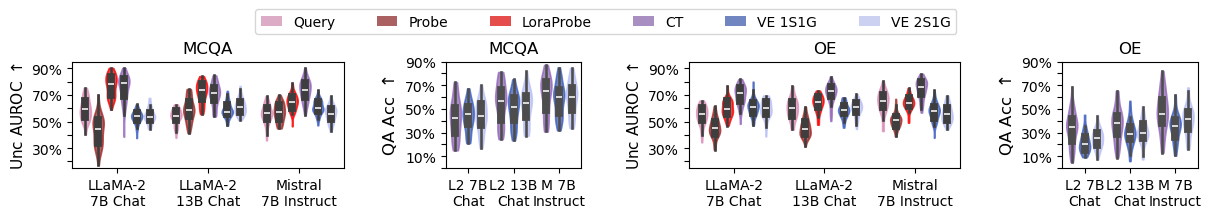

In [55]:
# fig, axs = plt.subplots(
#     2, 5, 
#     figsize=(12, 3),
#     constrained_layout=True,
#     # sharex=True,
#     # sharey=True,
#     gridspec_kw={
#         'width_ratios': [5, 0.15, 5, 0.15, 3],
#         #space between plots
#         'wspace': 0.1,
#         'hspace': 0.1,
#     },
# )

fig, axs = plt.subplots(
    1, 7, 
    figsize=(12, 1.75),
    constrained_layout=True,
    # sharex=True,
    # sharey=True,
    gridspec_kw={
        'width_ratios': [6, 0.05, 3, 0.15, 6, 0.05, 3],
        #space between plots
        'wspace': 0.1,
        'hspace': 0.1,
    },
)

hue_order = ["Query", "Probe", "LoraProbe", "CT", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

# ax = axs[0]
# sns.violinplot(
#     ax=ax,
#     data=mcqa_df,
#     hue="style",
#     x="model",
#     order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
#     y="unc_acc",
#     hue_order=hue_order,
#     palette=palette,
#     cut=0,
#     density_norm="width",
#     width=0.85,
#     gap=0.15,
#     alpha=0.8,
# )

# from matplotlib.collections import PolyCollection
# violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
# for i, violin in enumerate(violins):
#     violin.set_edgecolor(palette[i % len(palette)])

# ax.legend().remove()
# ax.set_xlabel("")
# ax.set_ylabel("Unc Acc $\\uparrow$", fontsize=12)
# ax.set_title("MCQA")

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
# ax.set_xticklabels([])

# ax = axs[2]
# sns.violinplot(
#     ax=ax,
#     data=oe_df,
#     hue="style",
#     x="model",
#     order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
#     y="unc_acc",
#     hue_order=hue_order,
#     palette=palette,
#     cut=0,
#     density_norm="width",
#     width=0.85,
#     gap=0.15,
#     alpha=0.8,
# )

# from matplotlib.collections import PolyCollection
# violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
# for i, violin in enumerate(violins):
#     violin.set_edgecolor(palette[i % len(palette)])

# ax.legend().remove()
# ax.set_xlabel("")
# ax.set_ylabel("Unc Acc $\\uparrow$", fontsize=12)
# ax.set_title("OE")

# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])


axs[1].axis('off')
axs[1].axis('off')

axs[3].axis('off')
axs[3].axis('off')

axs[5].axis('off')
axs[5].axis('off')

hue_order = ["Query", "Probe", "LoraProbe", "CT", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

ax = axs[0]
sns.violinplot(
    ax=ax,
    data=mcqa_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="unc_auroc",
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Unc AUROC $\\uparrow$", fontsize=11)
ax.set_title("MCQA")

ax.set_ylim((0.15, 0.95))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
# ax.set_xticklabels([])

ax = axs[4]
sns.violinplot(
    ax=ax,
    data=oe_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="unc_auroc",
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Unc AUROC $\\uparrow$", fontsize=11)
ax.set_title("OE")

ax.set_ylim((0.15, 0.95))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])

handles, labels = ax.get_legend_handles_labels()

l = fig.legend(
    handles=handles, 
    labels=labels, 
    loc='upper center', 
    ncol=6,
    columnspacing=3,
    handlelength=1.5,
    #move legend up vertically
    bbox_to_anchor=(0.5, 1.2),
)

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

# axs[0,3].axis('off')
# axs[1,3].axis('off')

hue_order = ["CT", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

ax = axs[2]
sns.violinplot(
    ax=ax,
    data=mcqa_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("QA Acc $\\uparrow$", fontsize=12)
ax.set_title("MCQA")

ax.set_ylim((0.0, 0.9))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
# ax.set_xticklabels([])
ax.set_xticklabels(["L2 7B\nChat", "L2 13B\nChat", "M 7B\nInstruct"], fontsize=10)

ax = axs[6]
sns.violinplot(
    ax=ax,
    data=oe_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=hue_order,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("QA Acc $\\uparrow$", fontsize=12)
ax.set_title("OE")

ax.set_xticklabels(["L2 7B\nChat", "L2 13B\nChat", "M 7B\nInstruct"], fontsize=10)

ax.set_ylim((0.0, 0.9))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])

plt.savefig("acc_auroc_violin_plots.pdf", bbox_inches="tight")

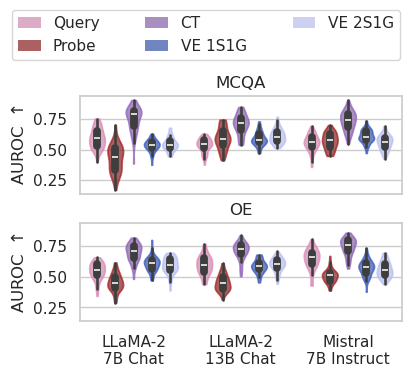

In [11]:
fig, axs = plt.subplots(
    2, 1, 
    figsize=(4, 3),
    constrained_layout=True,
    sharex=True,
    sharey=True,
)

hue_order = ["Query", "Probe", "CT", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    ax=axs[0],
    data=mcqa_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="unc_auroc",
    hue_order=["Query", "Probe", "CT", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[0].legend().remove()
axs[0].set_xlabel("")
axs[0].set_ylabel("AUROC $\\uparrow$", fontsize=12)
axs[0].set_title("MCQA")


sns.violinplot(
    ax=axs[1],
    data=oe_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="unc_auroc",
    hue_order=["Query", "Probe", "CT", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[1].legend().remove()
axs[1].set_xlabel("")
axs[1].set_ylabel("AUROC $\\uparrow$", fontsize=12)
axs[1].set_title("OE")

handles, labels = axs[0].get_legend_handles_labels()

l = fig.legend(
    handles=handles, 
    labels=labels, 
    loc='upper center', 
    ncol=3,
    columnspacing=3,
    handlelength=1.5,
    #move legend up vertically
    bbox_to_anchor=(0.5, 1.23),
)

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

plt.savefig("auroc_violin_plots.pdf", bbox_inches="tight")

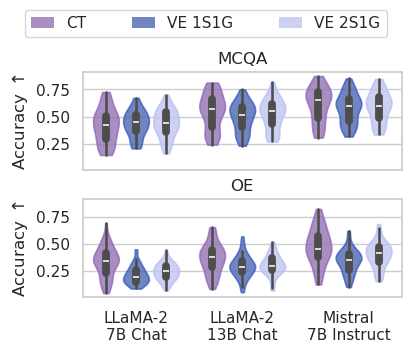

In [12]:
fig, axs = plt.subplots(
    2, 1, 
    figsize=(4, 3),
    constrained_layout=True,
    sharex=True,
    sharey=True,
)

hue_order = ["CT", "VE 1S1G", "VE 2S1G"]
palette = [color_map[x] for x in hue_order]

sns.violinplot(
    ax=axs[0],
    data=mcqa_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=["CT", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[0].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[0].legend().remove()
axs[0].set_xlabel("")
axs[0].set_ylabel("Accuracy $\\uparrow$", fontsize=12)
axs[0].set_title("MCQA")


sns.violinplot(
    ax=axs[1],
    data=oe_df,
    hue="style",
    x="model",
    order = ["LLaMA-2\n7B Chat", "LLaMA-2\n13B Chat", "Mistral\n7B Instruct"],
    y="acc",
    hue_order=["CT", "VE 1S1G", "VE 2S1G"],
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
)

from matplotlib.collections import PolyCollection
violins = [art for art in axs[1].get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

axs[1].legend().remove()
axs[1].set_xlabel("")
axs[1].set_ylabel("Accuracy $\\uparrow$", fontsize=12)
axs[1].set_title("OE")

handles, labels = axs[0].get_legend_handles_labels()

l = fig.legend(
    handles=handles, 
    labels=labels, 
    loc='upper center', 
    ncol=3,
    columnspacing=3,
    handlelength=1.5,
    #move legend up vertically
    bbox_to_anchor=(0.5, 1.15),
)

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

plt.savefig("qa_acc_violin_plots.pdf", bbox_inches="tight")

/tmp/ipykernel_3102230/1757154354.py:124: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(["model_name", "method_name", "dataset", "mode_tag"]).mean().reset_index()
/tmp/ipykernel_3102230/1757154354.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(vals[1:])


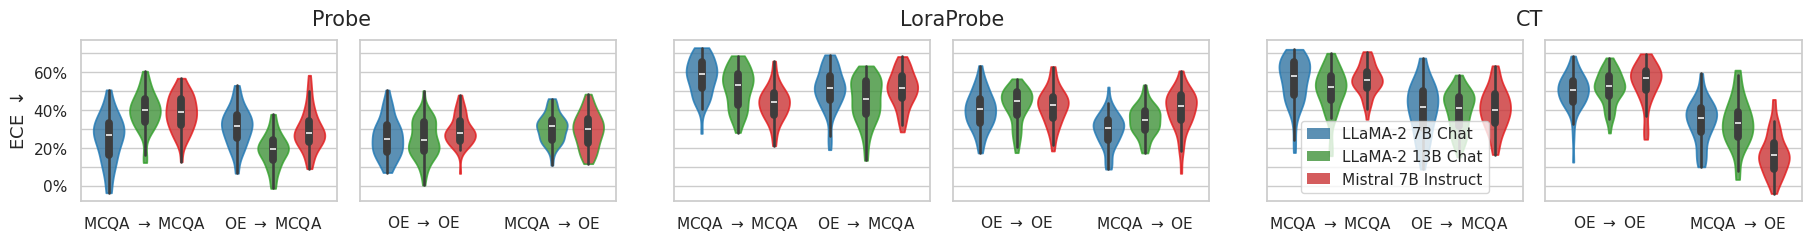

In [30]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

palette = sns.color_palette("Paired",6)[1::2]

fig, axs = plt.subplots(
    1, 8, 
    figsize=(18, 2),
    sharey=True, 
    gridspec_kw={
        'width_ratios': [1, 1, .05, 1, 1, 0.05, 1, 1],
        #space between plots
        'wspace': 0.1,
        'hspace': 0.1,
    },
    constrained_layout=True
)

all_dfs = []
for fn in glob.glob("results/eval-mmlu_choice-base/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = "Query_" + model_name
    df["mode_tag"] = "MCQA $\\rightarrow$ MCQA"
    all_dfs.append(df)

# for fn in glob.glob("results/eval-mmlu_choice-base-ts/*.csv"):
#     df = pd.read_csv(fn)
#     model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
#     df["model_name"] = "Query-TS_" + model_name
#     df["mode_tag"] = "choice -> choice"
#     all_dfs.append(df)

base_df = pd.concat(all_dfs)


all_dfs = []

for fn in glob.glob("results/eval-mmlu_choice-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT"
    df["mode_tag"] = "MCQA $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_choice-ct-oe_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT"
    df["mode_tag"] = "OE $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT"
    df["mode_tag"] = "OE $\\rightarrow$ OE"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-ct-choice_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "CT"
    df["mode_tag"] = "MCQA $\\rightarrow$ OE"
    all_dfs.append(df)


for fn in glob.glob("results/eval-mmlu_choice-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "LoraProbe"
    df["mode_tag"] = "MCQA $\\rightarrow$ MCQA"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe-choice_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "LoraProbe"
    df["mode_tag"] = "MCQA $\\rightarrow$ OE"
    all_dfs.append(df)

for fn in glob.glob("results/eval-mmlu_oe-lora_probe/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "LoraProbe"
    df["mode_tag"] = "OE $\\rightarrow$ OE"
    all_dfs.append(df)


for fn in glob.glob("results/eval-mmlu_choice-lora_probe-oe_transfer/*.csv"):
    df = pd.read_csv(fn)
    model_name = fn.split("/")[-1].replace(".csv", "").replace("-","_")
    df["model_name"] = model_name
    df["method_name"] = "LoraProbe"
    df["mode_tag"] = "OE $\\rightarrow$ MCQA"
    all_dfs.append(df)

ct_df = pd.concat(all_dfs)

mode_tag_map = {
    "choice": "MCQA",
    "oe": "OE",
}

probe_df = pd.read_csv("results/classifier_results.csv")
probe_df["mode_tag"] = probe_df["train_mode"].apply(lambda x: mode_tag_map[x]) + " $\\rightarrow$ " + probe_df["eval_mode"].apply(lambda x: mode_tag_map[x])
probe_df["method_name"] = 'Probe'

df = pd.concat([probe_df, ct_df])

#aggregate by model name
df = df.groupby(["model_name", "method_name", "dataset", "mode_tag"]).mean().reset_index()
df["unc_ece"] = df["unc_ece"].fillna(df["fuzzy_gpt-3.5-turbo-1106_unc_ece"])
df["unc_auroc"] = df["unc_auroc"].fillna(df["fuzzy_gpt-3.5-turbo-1106_unc_auroc"])

plot_metric = "unc_auroc"

model_name_map = {
    "llama2_7b": "LLaMA-2 7B",
    "llama2_7b_chat": "LLaMA-2 7B Chat",
    "llama2_13b": "LLaMA-2 13B",
    "llama2_13b_chat": "LLaMA-2 13B Chat",
    "mistral_7b": "Mistral 7B",
    "mistral_7b_instruct": "Mistral 7B Instruct",
}

df["model_name"] = df["model_name"].apply(lambda x: model_name_map[x])


_df = df[df['method_name'] == "Probe"]

ax = axs[0]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "MCQA $\\rightarrow$ MCQA") | (_df['mode_tag'] == "OE $\\rightarrow$ MCQA")],
    x="mode_tag",
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# handles, labels = axs[0].get_legend_handles_labels()

# axs[0].legend(handles=handles, labels=labels, loc='upper left')

#turn legend off
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("ECE $\downarrow$", fontsize=13)
# axs[0,0].set_title("Probe")
# ax.set_xticklabels([])

# ax.set_ylim(0, 0.6)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = [-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0]
vals = ['{:,.0%}'.format(vals[i // 2]) if i % 2 == 0 else "" for i in range(len(vals) * 2)]
ax.set_yticklabels(vals[1:])


ax = axs[1]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "OE $\\rightarrow$ OE") | (_df['mode_tag'] == "MCQA $\\rightarrow$ OE")],
    x="mode_tag",
    order=["OE $\\rightarrow$ OE", "MCQA $\\rightarrow$ OE"],
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")
# axs[0,1].set_title("Probe")
# ax.set_xticklabels([])

fig.text(-0.07, 1.13, "Probe", fontsize=15, ha='center', va='center', transform=ax.transAxes)

ax = axs[2]
#turn everything off
ax.axis('off')

_df = df[df['method_name'] == "LoraProbe"]

ax = axs[3]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "MCQA $\\rightarrow$ MCQA") | (_df['mode_tag'] == "OE $\\rightarrow$ MCQA")],
    x="mode_tag",
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# handles, labels = axs[0].get_legend_handles_labels()

# axs[0].legend(handles=handles, labels=labels, loc='upper left')

#turn legend off
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("ECE $\downarrow$", fontsize=13)
# axs[1,0].set_title("CT")

ax = axs[4]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "OE $\\rightarrow$ OE") | (_df['mode_tag'] == "MCQA $\\rightarrow$ OE")],
    x="mode_tag",
    order=["OE $\\rightarrow$ OE", "MCQA $\\rightarrow$ OE"],
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

ax.legend().remove()
ax.set_xlabel("")

fig.text(0, 1.13, "LoraProbe", fontsize=15, ha='center', va='center', transform=ax.transAxes)


ax = axs[5]
#turn everything off
ax.axis('off')

_df = df[df['method_name'] == "CT"]

ax = axs[6]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "MCQA $\\rightarrow$ MCQA") | (_df['mode_tag'] == "OE $\\rightarrow$ MCQA")],
    x="mode_tag",
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])

# handles, labels = axs[0].get_legend_handles_labels()

# axs[0].legend(handles=handles, labels=labels, loc='upper left')

#turn legend off
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("ECE $\downarrow$", fontsize=13)
# axs[1,0].set_title("CT")

ax = axs[7]
sns.violinplot(
    ax=ax,
    data=_df[(_df['mode_tag'] == "OE $\\rightarrow$ OE") | (_df['mode_tag'] == "MCQA $\\rightarrow$ OE")],
    x="mode_tag",
    order=["OE $\\rightarrow$ OE", "MCQA $\\rightarrow$ OE"],
    hue="model_name",
    hue_order=["LLaMA-2 7B Chat", "LLaMA-2 13B Chat", "Mistral 7B Instruct"],
    y=plot_metric,
    palette=palette,
    cut=0,
    density_norm="width",
    width=0.85,
    gap=0.15,
    alpha=0.8,
    # order=df.groupby(["model_name"]).mean().reset_index().sort_values("unc_ece")["model_name"],
)

from matplotlib.collections import PolyCollection
violins = [art for art in ax.get_children() if isinstance(art, PolyCollection)]
for i, violin in enumerate(violins):
    violin.set_edgecolor(palette[i % len(palette)])




handles, labels = ax.get_legend_handles_labels()

ax.legend().remove()
ax.set_xlabel("")
#offset title to the right
# axs[1,1].set_title(

#insert text to the right of the title
fig.text(-0.06, 1.13, "CT", fontsize=15, ha='center', va='center', transform=ax.transAxes)

l = axs[6].legend(
    handles=handles, labels=labels, 
    # loc='upper center',
    ncol=1,
    fontsize=11,
    columnspacing=3,
    handlelength=1.5,
    #move legend up vertically
    # bbox_to_anchor=(0.5, 1.3),
)

# #make one legend for the figure and place it at the top, off of the plot
# l = fig.legend(
#     handles=handles, labels=labels, 
#     loc='upper center',
#     ncol=6,
#     fontsize=11,
#     columnspacing=3,
#     handlelength=1.5,
#     #move legend up vertically
#     bbox_to_anchor=(0.5, 1.3),
# )

#remove edge from patches in the legend
for x in l.get_patches():
    x.set_edgecolor('none')

plt.savefig("transfer_violin_plots.pdf", bbox_inches="tight")

In [5]:
oe_df

,dataset,model,style,N,logits_ece,acc,unc_acc,unc_auroc,unc_ece,ts,...,fuzzy_gpt-3.5-turbo-1106_unc_ece,seed,model_dir,peft_dir,query_peft_dir,eval_kshot,fuzzy_gpt-3\\.5-turbo-1106_ece_counting,fuzzy_gpt-3\\.5-turbo-1106_auroc_counting,fuzzy_gpt-3\\.5-turbo-1106_ece_likelihood,fuzzy_gpt-3\\.5-turbo-1106_auroc_likelihood
0,mmlu:abstract_algebra,LLaMA-2\n13B,CT,100.0,NaN,0.230000,0.720000,0.347826,0.067304,382.078912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mmlu:abstract_algebra,LLaMA-2\n13B,CT-TS,100.0,NaN,0.240000,0.730000,0.346217,0.072057,391.304308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mmlu:abstract_algebra,LLaMA-2\n13B,Probe,100.0,NaN,0.240000,0.630000,0.369518,0.055561,107.789803,...,0.055561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mmlu:abstract_algebra,LLaMA-2\n13B,Query,100.0,NaN,0.250000,0.250000,0.599200,0.613919,375.990419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mmlu:abstract_algebra,LLaMA-2\n13B,Query-TS,100.0,NaN,0.250000,0.250000,0.595467,0.692669,398.303862,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,mmlu:world_religions,Mistral\n7B Instruct,Query-TS,171.0,NaN,0.684211,0.701754,0.503482,0.106854,406.219905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2775,mmlu:world_religions,Mistral\n7B Instruct,Samp. Counting,NaN,NaN,NaN,NaN,0.606961,0.090506,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.090506,0.606961,NaN,NaN
2776,mmlu:world_religions,Mistral\n7B Instruct,Samp. Likelihood,NaN,NaN,NaN,NaN,0.608740,0.087269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087269,0.60874
2777,mmlu:world_religions,Mistral\n7B Instruct,VE 1S1G,171.0,NaN,0.532164,0.649123,0.733791,0.356248,46.867732,...,0.356248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_880720/4127472581.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _mcqa_df = mcqa_df.groupby(["model", "style"]).mean().reset_index()
/tmp/ipykernel_880720/4127472581.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()


Query
Query-TS
Probe
Probe-TS
CT
CT-TS


/tmp/ipykernel_880720/4127472581.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_880720/4127472581.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_880720/4127472581.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])


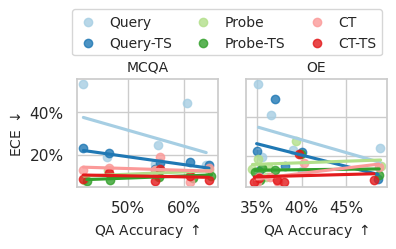

In [146]:
palette = sns.color_palette("Paired",7)

fig, axs = plt.subplots(
    1, 2, 
    figsize=(4, 1.4),
    # constrained_layout=True
)

_mcqa_df = mcqa_df.groupby(["model", "style"]).mean().reset_index()
_oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()

styles = [
    "Query",
    "Query-TS",
    "Probe",
    "Probe-TS",
    "CT",
    "CT-TS",
]
for i, style in enumerate(styles):
    print(style)

    sns.regplot(
        ax=axs[0],
        data=_mcqa_df[_mcqa_df['style'] == style],
        x="acc",
        y="unc_ece",
        label=style,
        color=palette[i],
        ci=0
    )

    sns.regplot(
        ax=axs[1],
        data=_oe_df[_oe_df['style'] == style],
        x="acc",
        y="unc_ece",
        label=style,
        color=palette[i],
        ci=0
    )

axs[0].set_ylabel("ECE $\downarrow$", fontsize=10)

#turn off y tick marks
axs[1].set_yticklabels([])
axs[1].set_ylabel("")
# axs[1].set_yticks([])

axs[0].set_xlabel("QA Accuracy $\\uparrow$", fontsize=10)
axs[1].set_xlabel("QA Accuracy $\\uparrow$", fontsize=10)

#turn x tick labels into percentage

# axs[0].xaxis.set_major_locator(plt.MultipleLocator(0.05))
vals = axs[0].get_xticks()
axs[0].set_xticklabels(['{:,.0%}'.format(x) for x in vals])

vals = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# axs[0].set_xticklabels(['{:,.0%}'.format(x) if i % 2 == 0 else '' for i, x in enumerate(vals)])
vals = axs[1].get_xticks()
axs[1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])

axs[0].set_title("MCQA", fontsize=10)
axs[1].set_title("OE", fontsize=10)

handles, labels = axs[0].get_legend_handles_labels()

fig.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    ncol=3,
    fontsize=10,
    columnspacing=1.5,
    handlelength=1.5,
    bbox_to_anchor=(0.5, 1.43),
)

fig.savefig("acc_ece_scatter.pdf", bbox_inches="tight")

/tmp/ipykernel_880720/3446875302.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()
/tmp/ipykernel_880720/3446875302.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order=oe_no_ts_df.groupby(["style"]).mean().reset_index().sort_values("unc_ece", ascending=False)["style"],
/tmp/ipykernel_880720/3446875302.py:45: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the func

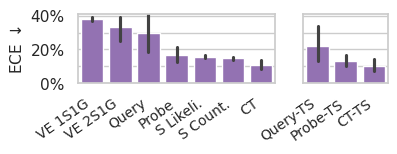

In [153]:
sns.set_theme(style="whitegrid")

_oe_df = oe_df.groupby(["model", "style"]).mean().reset_index()
# _df = _df[~_df['style'].str.contains("VE")]
_oe_df["style"] = _oe_df["style"].apply(lambda x: x.replace("Samp. Likelihood", "S Likeli."))
_oe_df["style"] = _oe_df["style"].apply(lambda x: x.replace("Samp. Counting", "S Count."))

oe_no_ts_df = _oe_df[~_oe_df['style'].str.contains("TS")]
oe_ts_df = _oe_df[_oe_df['style'].str.contains("TS")]

fig, axs = plt.subplots(
    1, 2, 
    figsize=(4, 0.9),
    gridspec_kw={
        'width_ratios': [7, 3],
    }
    # constrained_layout=True
)

sns.barplot(
    ax=axs[0],
    data=oe_no_ts_df,
    x="style",
    y="unc_ece",
    #sort by ece
    order=oe_no_ts_df.groupby(["style"]).mean().reset_index().sort_values("unc_ece", ascending=False)["style"],
    color=sns.color_palette("tab10",5)[4]
)

axs[0].set_xlabel("")

#rotate x labels
for tick in axs[0].get_xticklabels():
    tick.set_rotation(35)
    #make labels end at the tick 
    tick.set_ha('right')
    tick.set_fontsize(10)

sns.barplot(
    ax=axs[1],
    data=oe_ts_df,
    x="style",
    y="unc_ece",
    #sort by ece
    order=oe_ts_df.groupby(["style"]).mean().reset_index().sort_values("unc_ece", ascending=False)["style"],
    color=sns.color_palette("tab10",5)[4]
)

axs[0].set_ylabel("ECE $\downarrow$", fontsize=11)
axs[0].yaxis.set_major_locator(plt.MultipleLocator(0.1))
vals = axs[0].get_yticks()
# axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
axs[0].set_yticklabels(['{:,.0%}'.format(x) if i % 2 == 1 else '' for i, x in enumerate(vals)])


axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].set_yticklabels([])

axs[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))

# axs[1].set_yticks([])

axs[0].set_ylim(0, 0.41)
axs[1].set_ylim(0, 0.41)

#rotate x labels
for tick in axs[1].get_xticklabels():
    tick.set_rotation(35)
    #make labels end at the tick 
    tick.set_ha('right')
    #set font size
    tick.set_fontsize(10)

fig.savefig("agg_oe_bars.pdf", bbox_inches="tight")